In [133]:
import pandas as pd
import numpy as np

In [134]:
df = pd.read_csv("C:/Users/sksal/Downloads/heart.csv")

In [135]:
df.head() # data view


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [136]:
df.shape # the shape of data is 918 rows and 12 columns

(918, 12)

In [137]:
df.dtypes # the type of data

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [138]:
df.nunique() # every columns unique value number

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [139]:
df.ChestPainType.unique() # view unique value in ChestPainType

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [140]:
df.isnull().sum() # judge null value

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [141]:
# change to categorical number
# Sex
df.Sex.replace({'M':1,'F':0}, inplace = True)
# ChestPainType
df.ChestPainType.replace({'TA':0, 'ATA':1, 'NAP':2, 'ASY':3 }, inplace = True)
# RestingECG 
df.RestingECG.replace({'Normal':0, 'ST':1, 'LVH':2}, inplace = True)
# ExerciseAngina
df.ExerciseAngina.replace({'N':0, 'Y':1}, inplace = True)
# ST_Slope
df.ST_Slope.replace({'Up':0, 'Flat':1, 'Down':2}, inplace = True)

In [142]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,0,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,0,0
3,48,0,3,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,0,0


In [143]:
# define categorical and continuous feature
cat_col = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'] # categorical features
con_col = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'] # continuous features

In [144]:
round(df[con_col].describe(), 2) # two decimal

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89
std,9.43,18.51,109.38,0.42,25.46,1.07
min,28.00,0.00,0.00,0.00,60.00,-2.60
25%,47.00,120.00,173.25,0.00,120.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60
75%,60.00,140.00,267.00,0.00,156.00,1.50
max,77.00,200.00,603.00,1.00,202.00,6.20


In [145]:
# define categorical and continuous feature
cat_col = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'] # categorical features
con_col = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'] # continuous features
cat_col

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [146]:
round(df[con_col].describe(), 2) # two decimal

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89
std,9.43,18.51,109.38,0.42,25.46,1.07
min,28.00,0.00,0.00,0.00,60.00,-2.60
25%,47.00,120.00,173.25,0.00,120.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60
75%,60.00,140.00,267.00,0.00,156.00,1.50
max,77.00,200.00,603.00,1.00,202.00,6.20


In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(style='whitegrid')

config = {
    "font.family":'serif',
    "font.size": 10.5,
    "mathtext.fontset":'stix',
    "font.serif": ['Times New Roman'],
}
rcParams.update(config)

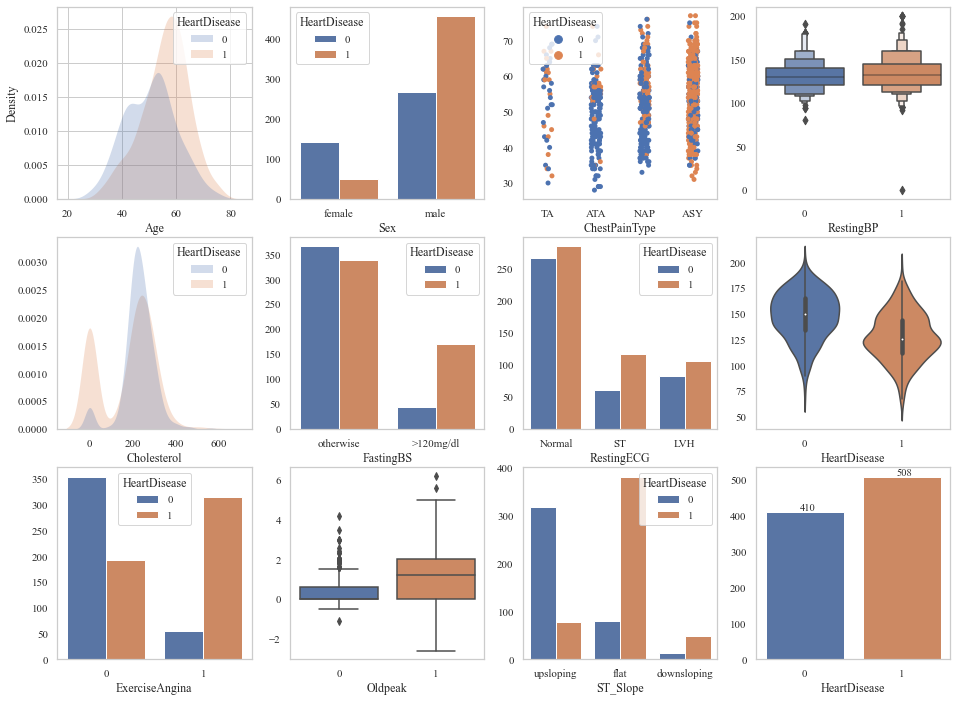

In [148]:
fig, ax = plt.subplots(3,4,figsize=(16,12))
# Age the relationship between Age and HeartDisease

sns.kdeplot(
    ax = ax[0][0],
    data = df,
    x = 'Age',
    hue = 'HeartDisease',
    fill = True,
    linewidth = 0
)


# Sex
sns.countplot(
    ax = ax[0][1],
    data = df,
    x = 'Sex',
    hue = 'HeartDisease'
)
ax[0][1].grid(False)
ax[0][1].set_xticklabels(['female','male'])
ax[0][1].set_ylabel('')

# ChestPainType
sns.stripplot(
    ax = ax[0][2],
    data=df,
    x='ChestPainType',
    y='Age',
    hue='HeartDisease'
)
ax[0][2].set_xticklabels(['TA', 'ATA', 'NAP', 'ASY'])
ax[0][2].set_ylabel('')
ax[0][2].grid(False)

# RestingBP
sns.boxenplot(
    ax = ax[0][3],
    data = df,
    y = 'RestingBP',
    x = 'HeartDisease'
)
ax[0][3].set_ylabel('')
ax[0][3].set_xlabel('RestingBP')
ax[0][3].grid(False)

# Cholesterol
sns.kdeplot(
    ax = ax[1][0],
    data = df,
    x = 'Cholesterol',
    hue = 'HeartDisease',
    fill = True,
    linewidth = 0
)
ax[1][0].grid(False)
ax[1][0].set_ylabel('')

# FastingBS fasting blood sugar
sns.countplot(
    ax = ax[1][1],
    data = df,
    x = 'FastingBS',
    hue = 'HeartDisease'
)
ax[1][1].set_xticklabels(['otherwise','>120mg/dl'])
ax[1][1].grid(False)
ax[1][1].set_ylabel('')

# RestingECG
sns.countplot(
    ax = ax[1][2],
    data = df,
    x = 'RestingECG',
    hue = 'HeartDisease'
)
ax[1][2].set_xticklabels(['Normal','ST','LVH'])
ax[1][2].grid(False)
ax[1][2].set_ylabel('')

# MaxHR
sns.violinplot(
    ax = ax[1][3],
    data = df,
    y = 'MaxHR',
    x = 'HeartDisease'
)
ax[1][3].grid(False)
ax[1][3].set_ylabel('')


# ExerciseAngina exercise-induced angina
sns.countplot(
    ax = ax[2][0],
    data = df,
    x = 'ExerciseAngina',
    hue = 'HeartDisease'
)
ax[2][0].grid(False)
ax[2][0].set_ylabel('')

# Oldpeak
sns.boxplot(
    ax = ax[2][1],
    data =df,
    x = 'HeartDisease',
    y = 'Oldpeak'
)
ax[2][1].grid(False)
ax[2][1].set_ylabel('')
ax[2][1].set_xlabel('Oldpeak')

# ST_Slope
sns.countplot(
    ax = ax[2][2],
    data = df,
    x = 'ST_Slope',
    hue = 'HeartDisease',
)
ax[2][2].set_xticklabels(['upsloping', 'flat', 'downsloping'])
ax[2][2].grid(False)
ax[2][2].set_ylabel('')

# HeartDisease
sns.countplot(
    ax = ax[2][3],
    data = df,
    x = 'HeartDisease',
)
for x, y in enumerate(df.HeartDisease.value_counts()[::-1]):
    # print(x,y)
   ax[2][3].text(x-0.05,y+3,'%s'%y)
ax[2][3].grid(False)
ax[2][3].set_ylabel('')

plt.show()

In [149]:
#Scaling
from sklearn.preprocessing import RobustScaler
# Train Test Split
from sklearn.model_selection import train_test_split

# models
# svc
from sklearn.svm import SVC
# logistic regression
from sklearn.linear_model import LogisticRegression
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve
# crossover validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [150]:
# one-hot coding
df = pd.get_dummies(df, columns=cat_col, drop_first=True)

In [151]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_1,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_1,RestingECG_2,ExerciseAngina_1,ST_Slope_1,ST_Slope_2
0,40,140,289,0,172,0.0,0,1,1,0,0,0,0,0,0,0
1,49,160,180,0,156,1.0,1,0,0,1,0,0,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,1,0,0,0,0
3,48,138,214,0,108,1.5,1,0,0,0,1,0,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,0,0,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,1,0,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,1,0,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,1,0,1,0


In [152]:
# define the features and target
y = df['HeartDisease']
X = df.drop('HeartDisease', axis=1)

# data scaler
scaler = RobustScaler()
X[con_col] = scaler.fit_transform(X[con_col])

X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_1,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_1,RestingECG_2,ExerciseAngina_1,ST_Slope_1,ST_Slope_2
0,-1.076923,0.5,0.704000,0.0,0.944444,-0.400000,1,1,0,0,0,0,0,0,0
1,-0.384615,1.5,-0.458667,0.0,0.500000,0.266667,0,0,1,0,0,0,0,1,0
2,-1.307692,0.0,0.640000,0.0,-1.111111,-0.400000,1,1,0,0,1,0,0,0,0
3,-0.461538,0.4,-0.096000,0.0,-0.833333,0.600000,0,0,0,1,0,0,1,1,0
4,0.000000,1.0,-0.298667,0.0,-0.444444,-0.400000,1,0,1,0,0,0,0,0,0


In [153]:
# define the train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('X_train shape is', X_train.shape)
print('X_test shape is', X_test.shape)
print('y_train shape is', y_train.shape)
print('y_test shape is', y_test.shape)

X_train shape is (734, 15)
X_test shape is (184, 15)
y_train shape is (734,)
y_test shape is (184,)


In [154]:
#Support vector classifier
svc = SVC(kernel='linear', C=1, random_state=1, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('the score of svc is', accuracy_score(y_pred, y_test))

the score of svc is 0.907608695652174


In [155]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Load the iris dataset
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

# Split the data into training and validation sets
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of values for C and gamma
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

# Create an SVM object
svm = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the GridSearchCV object on the training set
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
# Print the best hyperparameters and the best score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
svc = SVC(**best_params, random_state=42)
svc.fit(X_train, y_train)
val_accuracy = svc.score(X_test,y_test)

# Evaluate the performance of the best model on the validation set
#best_svm = grid_search.best_estimator_
#val_accuracy = best_svm.score(X_val, y_val)
print("Validation accuracy: ", val_accuracy)


Best hyperparameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best score:  0.8623986580933742
Validation accuracy:  0.8804347826086957


In [156]:
#Logistic Regression
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('the score of logistic regression is', accuracy_score(y_pred, y_test))


the score of logistic regression is 0.8967391304347826


In [157]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a random binary classification dataset
#X, y = make_classification(random_state=42)

# Split the dataset into training and validation sets
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters to tune over
hyperparams = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2']
}

# Create a logistic regression model
lr = LogisticRegression(random_state=42)

# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(lr, hyperparams, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Validation score: ", grid_search.best_score_)

# Retrain the model on the full dataset using the best hyperparameters
best_lr = grid_search.best_estimator_
best_lr.fit(X_train, y_train)

# Test the performance of the model on a separate test set
#X_test, y_test = make_classification(random_state=42)
test_score = best_lr.score(X_test, y_test)
print("Test score: ", test_score)


Best hyperparameters:  {'C': 1.0, 'penalty': 'l2'}
Validation score:  0.8569471624266145
Test score:  0.8967391304347826


C:\Users\sksal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sksal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sksal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sksal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

In [158]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate some random data
np.random.seed(123)
X = np.random.rand(100, 10)
y = np.random.rand(100)

# Split data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Train linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Train ridge regression model
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)

# Make predictions on test set and calculate mean squared error
linear_reg_pred = linear_reg.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)

ridge_reg_pred = ridge_reg.predict(X_test)
ridge_reg_mse = mean_squared_error(y_test, ridge_reg_pred)

print('Linear regression MSE:', linear_reg_mse)
print('Ridge regression MSE:', ridge_reg_mse)


Linear regression MSE: 0.08600326936461171
Ridge regression MSE: 0.08617987017712751
